In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import statsmodels.api as sm

In [2]:
import matplotlib.font_manager as fm
from matplotlib import rc, font_manager

rc('font', family="NanumGothic")

In [3]:
df_raw=pd.read_csv("../data/BigData/직무능력평가.csv", engine="python", encoding="CP949")

df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [4]:
df_raw_x = df_raw.drop('EVAL', axis=1)
df_raw_y = df_raw['EVAL']
df_raw_y.head()

0    43
1    63
2    71
3    61
4    81
Name: EVAL, dtype: int64

**선형관계 확인 : 산점도 및 상관계수**

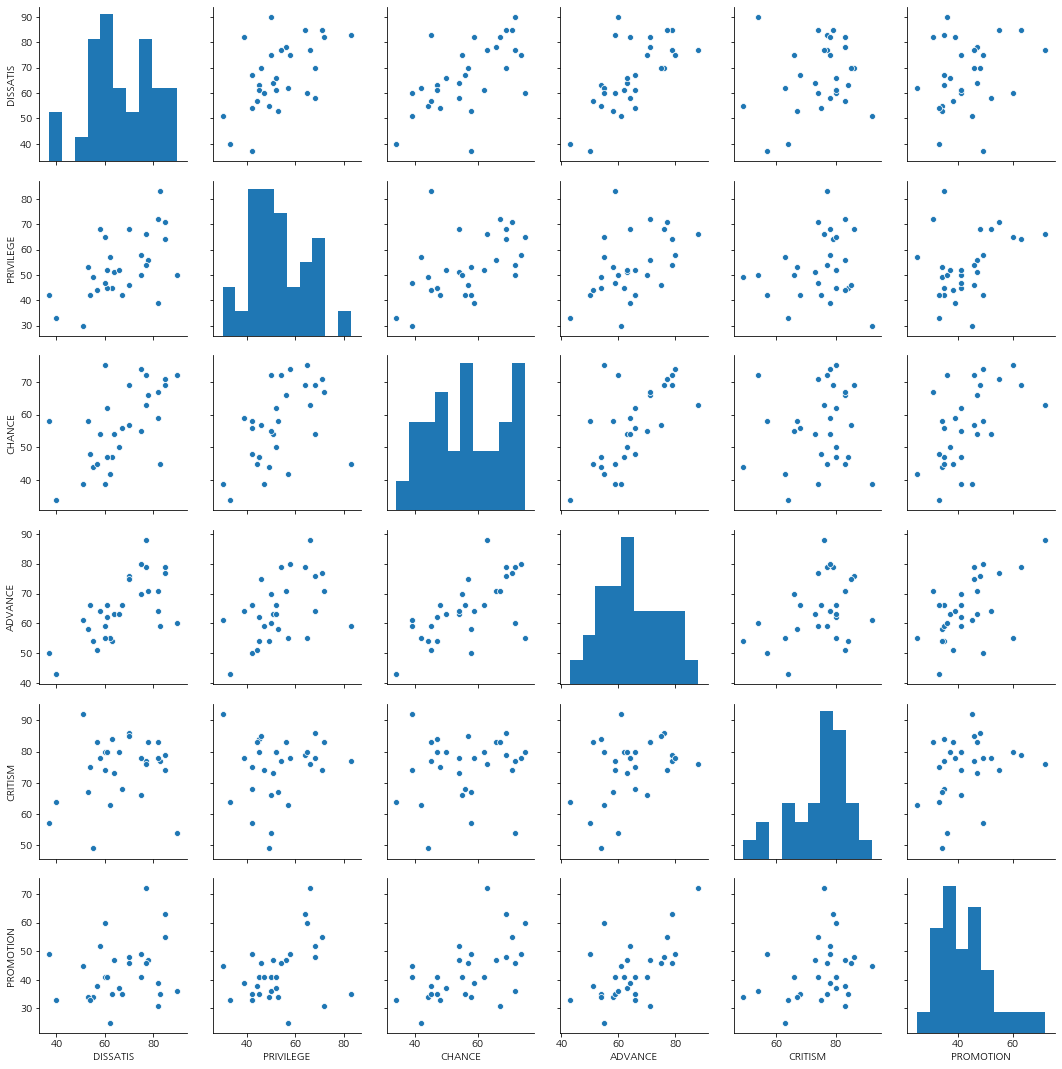

In [49]:
sns.pairplot(df_raw_x)

In [6]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


* DISSATIS는 CHANVE(0.597), ADVANCE(0.669)와 상관관계가 높음
* CHANCE는 ADVANCE(0.640)와 상관관계가 높음

**데이터 확인 및 Scaling**

In [7]:
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [8]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print('Scaled Data:\n{}'.format(nd_scaled[:5].round(3)))
print('Shape : \n{}'.format(nd_scaled.shape))

Scaled Data:
[[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape : 
(30, 6)


In [9]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [10]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


**주성분 분석**

In [13]:
pca= PCA(n_components=6)
nd_pca=pca.fit_transform(df_scaled)

print("PCA Data:\n{}".format(nd_pca[:5]))

print("Shape : \n{}".format(nd_pca.shape))

PCA Data:
[[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape : 
(30, 6)


**주성분 분석 및 결과 : 주성분 점수**

In [33]:
df_pca=pd.DataFrame(nd_pca,columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


**주성분 분석 및 결과 : 고유값(EigenValue)확인 및 주성분 개수 결정**

In [19]:
df_pca_stat=pd.DataFrame()
df_pca_stat['PrinNo']=[i for i in range(1,7)]
df_pca_stat['EigenValues']=pca.explained_variance_
df_pca_stat['EigenValueRatio']=pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


**주성분 분석 및 결과 : Scree plot 확인 및 주성분 개수 결정**

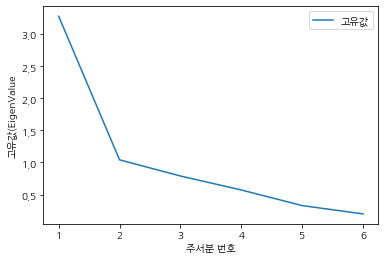

In [20]:
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['EigenValues'],label="고유값")
plt.ylabel('고유값(EigenValue')
plt.xlabel("주서분 번호")
plt.legend(loc="best")

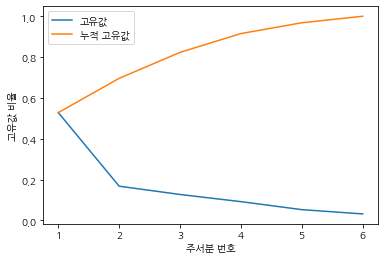

In [21]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'],label="고유값")
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['CumEigenValueRatio'],label="누적 고유값")
plt.ylabel('고유값 비율')
plt.xlabel("주성분 번호")
plt.legend(loc="best")

**주성분 분석 및 결과 : 고유 벡터(Eigenvector) 확인 및 해석**

In [22]:
x_cols = pd.DataFrame({'Feature':df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,\
                                                columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


* 고유값 확인 및 주성분 해석
    - 1주성분은 배움 기회와 승진 간의 양의 연관성
    - 2주성분은 불만처리와 특권 허용 간의 음의 연관성 확인
* 분석가에 따라 다른 그룹 생성 및 해석 가능

**주성분 상관/회귀분석 : 상관관계**

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


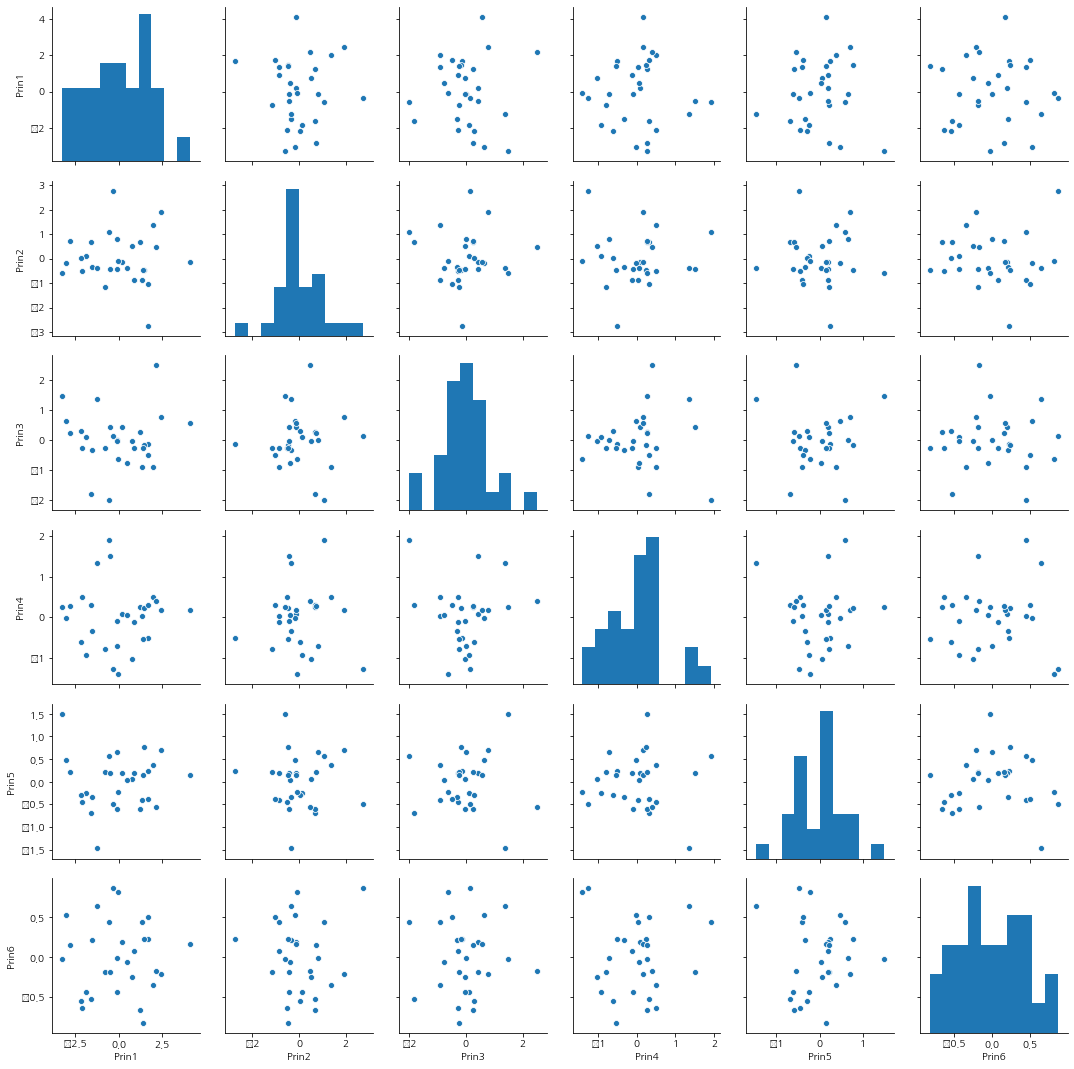

In [24]:
sns.pairplot(df_pca)

In [25]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


**주성분 상관/회귀분석 :회귀분석**

In [31]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)

reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           1.24e-05
Time:                        11:33:53   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [29]:
# 참조) Scale 변환 데이터를 이용한 회귀 분석
df_scaled_const= sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           1.24e-05
Time:                        11:32:35   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [51]:
# 다중 선형 주성분 회귀분석 : 주성분 점수(score)데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var=['Prin1','Prin2','Prin3']

#선택된 주성분 점수 데이터에 절편(constant) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     15.50
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           1.68e-06
Time:                        11:46:10   Log-Likelihood:                -98.327
No. Observations:                  30   AIC:                             206.7
Df Residuals:                      25   BIC:                             213.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.283     50.377      0.0

In [48]:
df_pca_const.head()

,const,Prin1,Prin2,Prin3,Prin4
0,1.0,1.676070,-2.738564,-0.128436,-0.503213
1,1.0,0.218344,-0.126153,0.431158,0.087262
2,1.0,-2.105151,-0.515007,-0.276831,0.491311
3,1.0,1.359940,-0.860646,-0.917991,0.031738
4,1.0,-1.512035,-0.352770,-0.326844,-0.328779


# 결론
* 전체 설명변수를 이용한 모델보다 3개 주성분을 이용한 회귀모델의 설명력이 **약 11% 저하됨**
    * 기열율이 약한 주성분 3개 (주성분 4~6)를 제외하여 설명력이 저하됨
* 주성분 회귀분석의 회귀계수는 모두 유의함

# 실습
* IRIS 품종 특성 데이터 이다. 꽃잎 및 꽃받침 길이와 넓이 자료를 이용해서 주성분 분석을 실시하고 결과를 해석하시오.

In [52]:
df_raw=pd.read_csv("../data/BigData/IRIS.csv", engine="python", encoding="CP949")

df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
df_raw_x = df_raw.drop('SPECIES', axis=1)
df_raw_y = df_raw['SPECIES']
df_raw_y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: SPECIES, dtype: object

**선형관계 확인 : 산점도 및 상관계수**

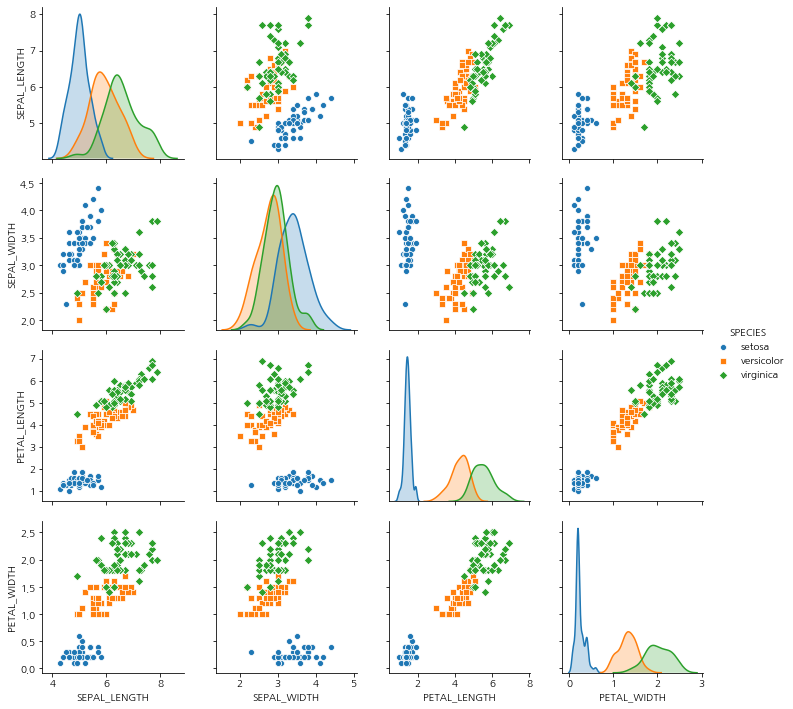

In [77]:
#sns.pairplot(df_raw_x)
sns.pairplot(df_raw, hue="SPECIES", markers=["o", "s", "D"])

In [56]:
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


* SEPAL_LENGTH는 PETAL_LENGTH(0.872), PETAL_WIDTH(0.818)와 상관관계가 높음
* PETAL_LENGTH는 PETAL_WIDTH(0.963)와 상관관계가 높음

**데이터 확인 및 Scaling**

In [62]:
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [63]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print('Scaled Data:\n{}'.format(nd_scaled[:5].round(3)))
print('Shape : \n{}'.format(nd_scaled.shape))

Scaled Data:
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape : 
(150, 4)


In [64]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [65]:
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


**주성분 분석**

In [66]:
pca= PCA(n_components=4)
nd_pca=pca.fit_transform(df_scaled)

print("PCA Data:\n{}".format(nd_pca[:3]))

print("Shape : \n{}".format(nd_pca.shape))

PCA Data:
[[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]]
Shape : 
(150, 4)


**주성분 분석 및 결과 : 주성분 점수**

In [67]:
df_pca=pd.DataFrame(nd_pca,columns=["Prin1","Prin2","Prin3","Prin4"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


**주성분 분석 및 결과 : 고유값(EigenValue)확인 및 주성분 개수 결정**

In [68]:
df_pca_stat=pd.DataFrame()
df_pca_stat['PrinNo']=[i for i in range(1,5)]
df_pca_stat['EigenValues']=pca.explained_variance_
df_pca_stat['EigenValueRatio']=pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


**주성분 분석 및 결과 : Scree plot 확인 및 주성분 개수 결정**

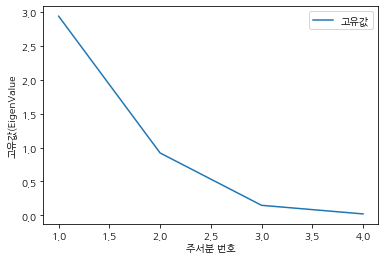

In [69]:
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['EigenValues'],label="고유값")
plt.ylabel('고유값(EigenValue')
plt.xlabel("주서분 번호")
plt.legend(loc="best")

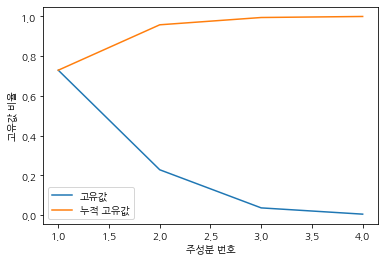

In [70]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'],label="고유값")
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['CumEigenValueRatio'],label="누적 고유값")
plt.ylabel('고유값 비율')
plt.xlabel("주성분 번호")
plt.legend(loc="best")

**주성분 분석 및 결과 : 고유 벡터(Eigenvector) 확인 및 해석**

In [71]:
x_cols = pd.DataFrame({'Feature':df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,\
                                                columns=["Prin1","Prin2","Prin3","Prin4"])],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


* 고유값 확인 및 주성분 해석
    - 1주성분은 PETAL_LEGNTH와 PETAL_WIDTH 간의 음의 연관성
    - 2주성분은 SEPAL_WIDH와 음의 연관성 확인
* 분석가에 따라 다른 그룹 생성 및 해석 가능

**주성분 상관/회귀분석 : 상관관계**

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


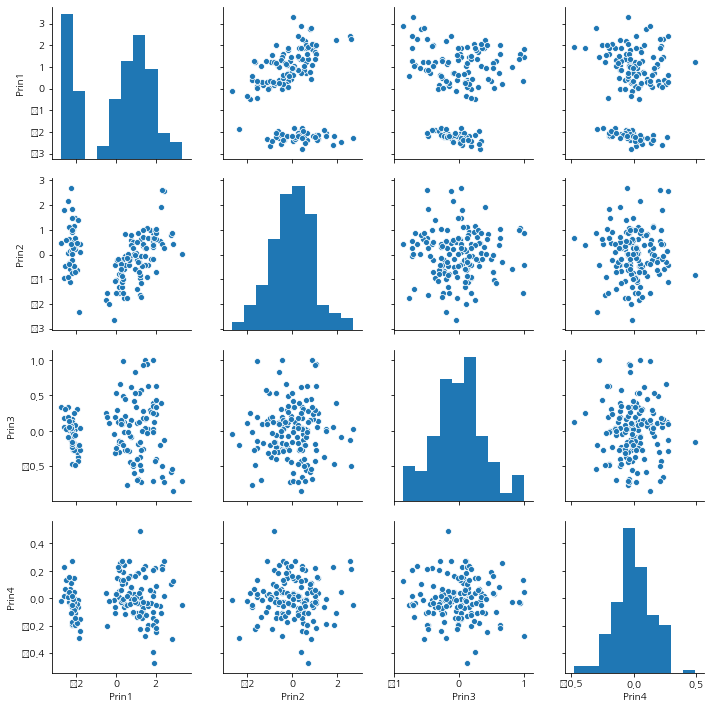

In [72]:
sns.pairplot(df_pca)

In [73]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,0.0,-0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0
Prin3,-0.0,-0.0,1.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0


#  군집분석

In [79]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
from sklearn.cluster import KMeans, DBSCAN

In [81]:
df=pd.read_csv("../data/BigData/직무능력평가.csv", encoding="cp949")
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [82]:
df_x=df.drop('EVAL',axis=1)
df_y=df['EVAL']

In [83]:
scaler = StandardScaler()
df_scaled_x = scaler.fit_transform(df_x)
df_scaled_x[:5] #np.ndarray 형태가 되기 때문에 index로 확인한다.

array([[-1.19166169, -1.92300586, -1.50494461, -0.35542617,  1.77141034,
         0.20430138],
       [-0.19861028, -0.17733772, -0.20508842, -0.15977874, -0.18159526,
         0.4020124 ],
       [ 0.25972114,  1.23582221,  1.09476777,  1.11192959,  1.15467173,
         0.50086791],
       [-0.27499885, -0.67610004, -0.81168798, -1.0401922 ,  0.9490922 ,
        -0.78425369],
       [ 0.87082969,  0.23829756,  0.83479653,  0.622811  ,  0.84630243,
         0.4020124 ]])

In [84]:
df_raw_x=df_scaled_x

### Hierarchical

ward, euclidean

Text(0, 0.5, 'sample index')

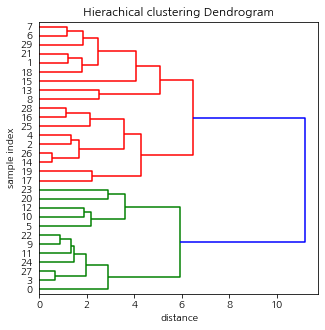

In [102]:
Z_ward = linkage(df_raw_x, method="ward", metric = "euclidean" )
Z_average = linkage(df_raw_x, method="average", metric = "euclidean")
Z_Minkowski=linkage(df_raw_x, method="average",metric='minkowski')

plt.figure(figsize=(5,5))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size=10, orientation="right")
plt.title('Hierachical clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel("sample index")


average, euclidean

Text(0, 0.5, 'sample index')

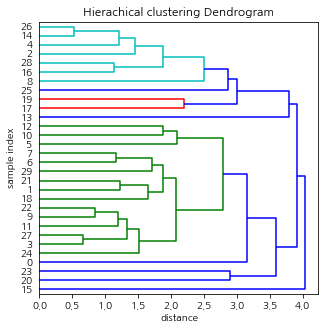

In [100]:
Z_ward = linkage(df_raw_x, method="ward", metric = "euclidean" )
Z_average = linkage(df_raw_x, method="average", metric = "euclidean")
Z_Minkowski=linkage(df_raw_x, method="average",metric='minkowski')

plt.figure(figsize=(5,5))
ax = plt.subplot(111)

dendrogram(Z_average, leaf_font_size=10, orientation="right")
plt.title('Hierachical clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel("sample index")


average, minkowski

Text(0, 0.5, 'sample index')

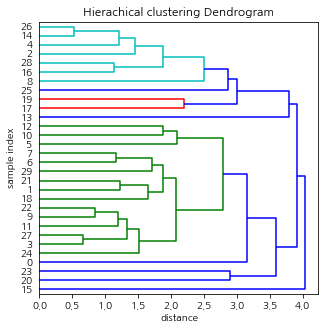

In [103]:
Z_ward = linkage(df_raw_x, method="ward", metric = "euclidean" )
Z_average = linkage(df_raw_x, method="average", metric = "euclidean")
Z_Minkowski=linkage(df_raw_x, method="average",metric='minkowski')

plt.figure(figsize=(5,5))
ax = plt.subplot(111)

dendrogram(Z_Minkowski, leaf_font_size=10, orientation="right")
plt.title('Hierachical clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel("sample index")


In [110]:
cluster_hierarchical=fcluster(Z=Z_ward, t=5, criterion="distance")
df['ClusterHierarchical']=cluster_hierarchical
df

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,1
1,63,64,51,54,63,73,47,5,1
2,71,70,68,69,76,86,48,3,2
3,61,63,45,47,54,84,35,1,1
4,81,78,56,66,71,83,47,3,2
5,43,55,49,44,54,49,34,2,5
6,58,67,42,56,66,68,35,5,3
7,71,75,50,55,70,66,41,5,3
8,72,82,72,67,71,83,31,4,4
9,67,61,45,47,62,80,41,1,1


In [90]:
ds_summary_hc = df.groupby('ClusterHierarchical').agg(['min','mean','max'])

level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)

ds_summary_hc.columns=level0+"_"+level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


### KMeans

In [122]:
n_iter_cluster=30
cluster_range = [i+1 for i in range(n_iter_cluster)]

clus_error=[]

for v_n_clus in cluster_range:
    clus=KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    clus_error.append(clus.inertia_)
    
ds_error = pd.DataFrame({"NumberofCluster":cluster_range, "Error":clus_error})
ds_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.932631
3,4,79.567709
4,5,66.842548
5,6,57.045762
6,7,53.417259
7,8,42.068041
8,9,36.841454
9,10,33.557876


Text(0, 0.5, 'sum of squared distance')

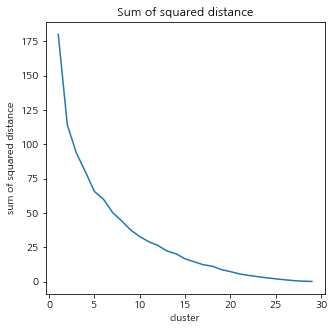

In [118]:
plt.figure(figsize=(5,5))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title('Sum of squared distance')
plt.xlabel('cluster')
plt.ylabel('sum of squared distance')

In [96]:
clus =KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df['ClusterKmeans'] = cluster_kmeans
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,1
1,63,64,51,54,63,73,47,5,1
2,71,70,68,69,76,86,48,3,2
3,61,63,45,47,54,84,35,1,1
4,81,78,56,66,71,83,47,3,2


In [111]:
ds_summary_km = df.drop('ClusterHierarchical', axis=1, inplace=False).groupby('ClusterKmeans').agg(['count','min','mean','max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)

ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_count,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_count,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_count,...,ADVANCE_mean,ADVANCE_max,CRITISM_count,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_count,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,11,43,58.545,67,11,51,60.455,70,11,...,62.182,75,11,73,80.364,92,11,33,41.455,52
1,2,8,65,74.625,85,8,60,75.875,85,8,...,75.625,88,8,74,79.125,86,8,46,55.000,72
2,3,5,58,71.200,82,5,53,73.400,90,5,...,63.600,70,5,54,66.600,78,5,34,37.000,41
3,4,2,68,70.000,72,2,82,82.500,83,2,...,65.000,71,2,77,80.000,83,2,31,33.000,35
4,5,4,40,50.500,69,4,37,48.500,62,4,...,50.500,55,4,49,58.250,64,4,25,35.250,49


In [121]:
df.shape

(30, 11)

### DBSCAN

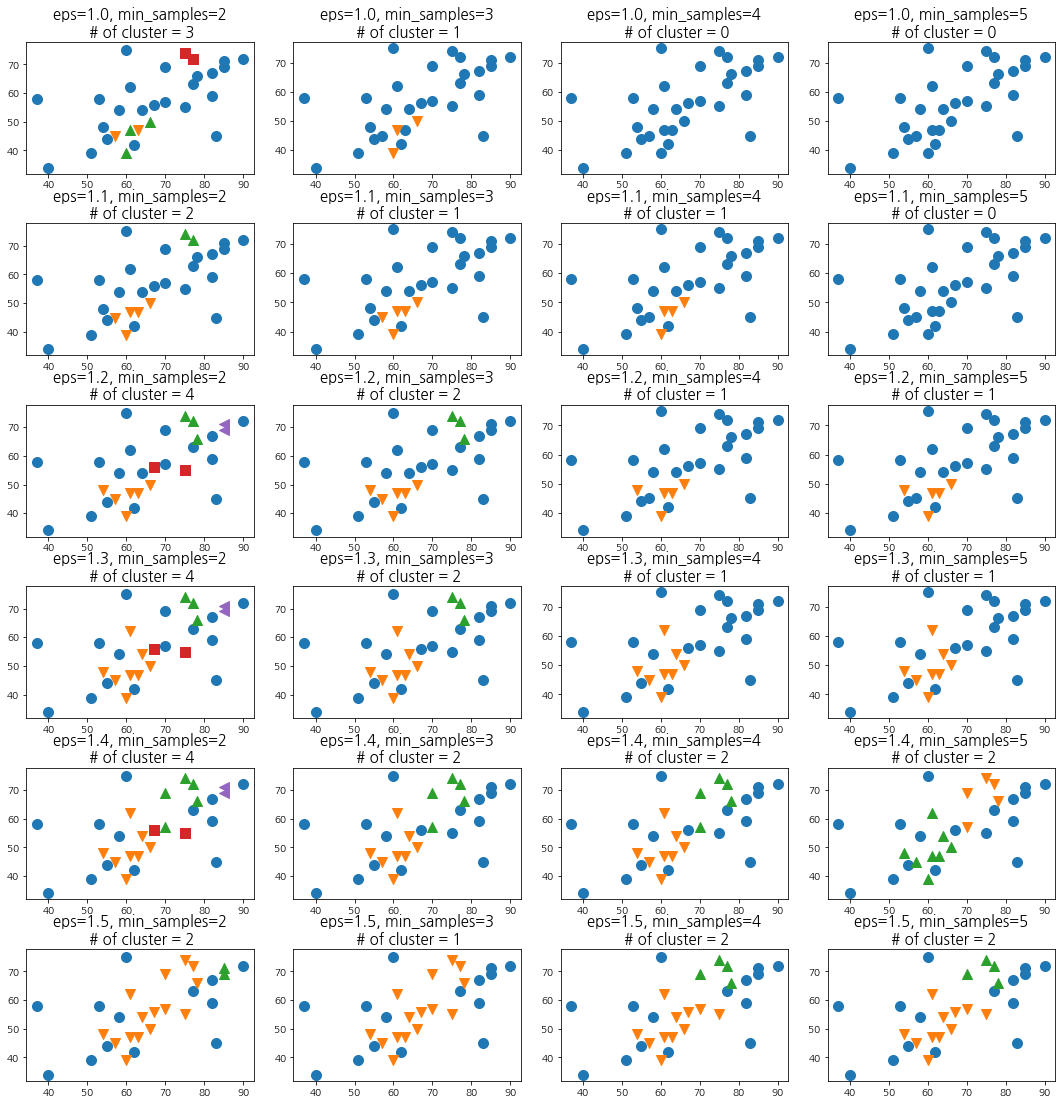

In [129]:
X=df['DISSATIS']
Y=df['CHANCE']

markers = ['o','v','^','s','<','>','p','D']

para_eps =[k/10 for k in range(10, 16)]
para_min_sample=[2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize=(15,15))
fig.tight_layout(w_pad=1, h_pad=3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples = min_sample, eps=eps)
        clusters = dbscan.fit_predict(df_raw_x)
        clusters+=1
        
        for(n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1)):
            axes[i,j].scatter(X[clusters==clus], Y[clusters==clus], marker=markers[n_clus], s=100)
            axes[i,j].set_title('eps='+str(eps)+', min_samples='+str(min_sample)+'\n # of cluster = '+str(max(clusters)),fontsize=15)

In [119]:
dbscan = DBSCAN(eps = 1.4, min_samples=2).fit(df_raw_x)

cluster_dbscan = dbscan.labels_

for(i, val) in enumerate(cluster_dbscan):
    if val<0:
        cluster_dbscan[i]=0
    else:
        cluster_dbscan[i]=cluster_dbscan[i]+1
df['ClusterDBScan']=cluster_dbscan
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,ClsuterDBScan,ClusterDBScan
0,43,51,30,39,61,92,45,1,1,0,0
1,63,64,51,54,63,73,47,5,1,1,1
2,71,70,68,69,76,86,48,3,2,2,2
3,61,63,45,47,54,84,35,1,1,1,1
4,81,78,56,66,71,83,47,3,2,2,2


In [120]:
db_summary_db = df.drop(['ClusterHierarchical','ClusterKmeans'], axis=1).groupby('ClusterDBScan').agg(['min','mean','max'])
level0 = db_summary_db.columns.get_level_values(0)
level1 = db_summary_db.columns.get_level_values(1)

db_summary_db.columns=level0+"_"+level1
db_summary_db.reset_index(inplace = True)
db_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max,ClsuterDBScan_min,ClsuterDBScan_mean,ClsuterDBScan_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,88,49,70.615,92,25,41.923,72,0,0,0
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,66,73,78.625,84,33,39.125,47,1,1,1
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,80,77,81.800,86,46,47.200,49,2,2,2
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,70,66,67.000,68,35,38.000,41,3,3,3
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,79,74,76.500,79,55,59.000,63,4,4,4


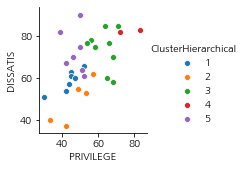

In [135]:
sns.pairplot(df, hue="ClusterHierarchical", x_vars=['PRIVILEGE'], y_vars=['DISSATIS'])

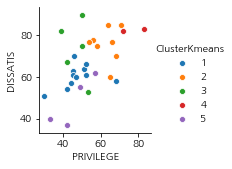

In [136]:
sns.pairplot(df, hue="ClusterKmeans", x_vars=['PRIVILEGE'], y_vars=['DISSATIS'])

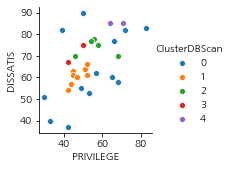

In [137]:
sns.pairplot(df, hue="ClusterDBScan", x_vars=['PRIVILEGE'], y_vars=['DISSATIS'])

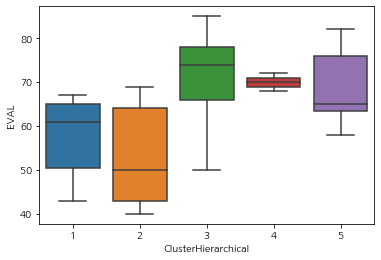

In [140]:
sns.boxplot(x="ClusterHierarchical", y='EVAL',data=df)

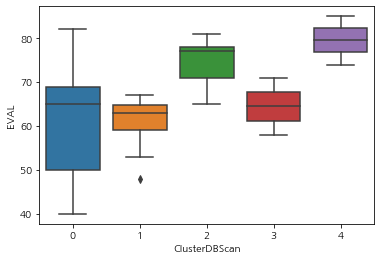

In [141]:
sns.boxplot(x="ClusterDBScan", y='EVAL',data=df)

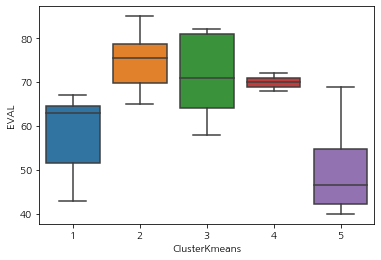

In [142]:
sns.boxplot(x="ClusterKmeans", y='EVAL',data=df)

# 실습